In [1]:
import mplfinance as mpf
import pandas as pd
from dataloader import get_candle_data
import numpy as np

In [2]:
symbol = 'GESHIP'
portfolio = pd.read_csv('../data/portfolio.csv')
#print(portfolio.head())
#print(portfolio[portfolio['SYMBOL'] == symbol])
instrument = portfolio.loc[portfolio['SYMBOL'] == symbol, 'INSTRUMENT_KEY']
instrument = instrument.replace('|', '%7C')
instrument

0    NSE_EQ|INE017A01032
Name: INSTRUMENT_KEY, dtype: object

In [ ]:
to_date = '2025-07-05'
from_date = '2015-01-01'
frequency = '1'
interval = 'months'

In [4]:
candle_data = get_candle_data(str(instrument[0]), interval, to_date, from_date, frequency)

https://api.upstox.com/v3/historical-candle/NSE_EQ|INE017A01032/weeks/1/2025-07-05/2015-01-01
{'status': 'success', 'data': {'candles': [['2025-06-30T00:00:00+05:30', 975.8, 1039.95, 972.5, 1033.0, 3799887, 0], ['2025-06-23T00:00:00+05:30', 970.0, 1004.9, 963.05, 973.8, 3648994, 0], ['2025-06-16T00:00:00+05:30', 1001.25, 1025.0, 935.7, 962.85, 5390381, 0], ['2025-06-09T00:00:00+05:30', 1001.9, 1049.0, 941.4, 989.45, 9739399, 0], ['2025-06-02T00:00:00+05:30', 927.95, 1022.65, 926.6, 985.2, 6057173, 0], ['2025-05-26T00:00:00+05:30', 927.85, 957.0, 922.5, 930.8, 2091235, 0], ['2025-05-19T00:00:00+05:30', 985.0, 992.15, 904.65, 923.3, 3341930, 0], ['2025-05-12T00:00:00+05:30', 863.05, 984.0, 863.05, 972.75, 5910396, 0], ['2025-05-05T00:00:00+05:30', 884.0, 935.0, 845.0, 875.55, 2380465, 0], ['2025-04-28T00:00:00+05:30', 876.0, 916.85, 865.0, 877.6, 978455, 0], ['2025-04-21T00:00:00+05:30', 883.95, 940.0, 873.25, 886.7, 1835972, 0], ['2025-04-14T00:00:00+05:30', 870.0, 905.0, 861.3, 878.2, 

In [5]:
candle_data

,date,open,high,low,close,vol,misc
date,,,,,,,
2025-06-30 00:00:00+05:30,2025-06-30T00:00:00+05:30,975.80,1039.95,972.50,1033.00,3799887,0
2025-06-23 00:00:00+05:30,2025-06-23T00:00:00+05:30,970.00,1004.90,963.05,973.80,3648994,0
2025-06-16 00:00:00+05:30,2025-06-16T00:00:00+05:30,1001.25,1025.00,935.70,962.85,5390381,0
2025-06-09 00:00:00+05:30,2025-06-09T00:00:00+05:30,1001.90,1049.00,941.40,989.45,9739399,0
2025-06-02 00:00:00+05:30,2025-06-02T00:00:00+05:30,927.95,1022.65,926.60,985.20,6057173,0
...,...,...,...,...,...,...,...
2015-01-26 00:00:00+05:30,2015-01-26T00:00:00+05:30,357.70,374.70,349.65,359.90,479984,0
2015-01-19 00:00:00+05:30,2015-01-19T00:00:00+05:30,350.10,359.90,347.50,356.35,539865,0
2015-01-12 00:00:00+05:30,2015-01-12T00:00:00+05:30,353.70,355.45,345.00,350.05,486327,0


In [6]:
candle_data.sort_index(ascending=True, inplace=True)

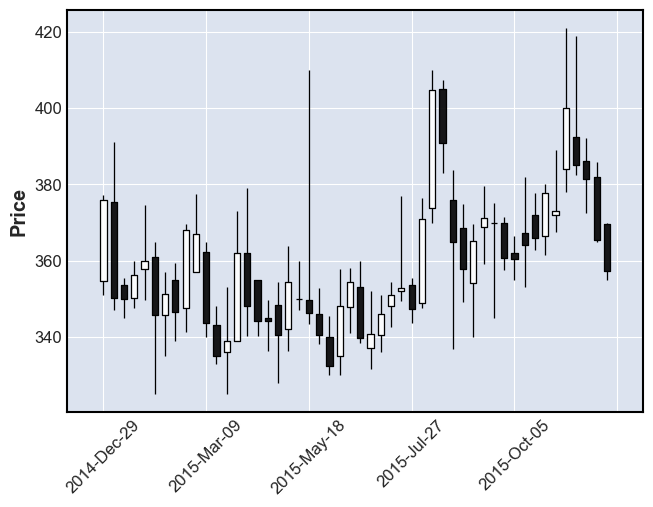

In [7]:
mpf.plot(candle_data[:50], type='candle')

In [8]:
candle_data['returns'] = candle_data['close']/candle_data['close'].shift(1) -1
candle_data['l_returns'] = np.log(candle_data['close']/candle_data['close'].shift(1))
candle_data.head()

,date,open,high,low,close,vol,misc,returns,l_returns
date,,,,,,,,,
2014-12-29 00:00:00+05:30,2014-12-29T00:00:00+05:30,354.7,377.20,351.00,375.80,235480,0,NaN,NaN
2015-01-05 00:00:00+05:30,2015-01-05T00:00:00+05:30,375.5,391.25,347.10,350.20,733797,0,-0.068121,-0.070553
2015-01-12 00:00:00+05:30,2015-01-12T00:00:00+05:30,353.7,355.45,345.00,350.05,486327,0,-0.000428,-0.000428
2015-01-19 00:00:00+05:30,2015-01-19T00:00:00+05:30,350.1,359.90,347.50,356.35,539865,0,0.017997,0.017837
2015-01-26 00:00:00+05:30,2015-01-26T00:00:00+05:30,357.7,374.70,349.65,359.90,479984,0,0.009962,0.009913


In [9]:
candle_data.dropna(inplace=True)
candle_data.head()

,date,open,high,low,close,vol,misc,returns,l_returns
date,,,,,,,,,
2015-01-05 00:00:00+05:30,2015-01-05T00:00:00+05:30,375.5,391.25,347.10,350.20,733797,0,-0.068121,-0.070553
2015-01-12 00:00:00+05:30,2015-01-12T00:00:00+05:30,353.7,355.45,345.00,350.05,486327,0,-0.000428,-0.000428
2015-01-19 00:00:00+05:30,2015-01-19T00:00:00+05:30,350.1,359.90,347.50,356.35,539865,0,0.017997,0.017837
2015-01-26 00:00:00+05:30,2015-01-26T00:00:00+05:30,357.7,374.70,349.65,359.90,479984,0,0.009962,0.009913
2015-02-02 00:00:00+05:30,2015-02-02T00:00:00+05:30,361.0,364.85,325.10,345.65,842786,0,-0.039594,-0.040400


In [10]:
candle_data.to_csv(f'../data/symbols/{symbol}.csv')